In [476]:
# Importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#import seaborn; seaborn.set()
%matplotlib inline

### Dataset file location: [Fremont_Bridge_Bicycle_Counter](https://data.seattle.gov/Transportation/Fremont-Bridge-Bicycle-Counter/65db-xm6k)

In [502]:
ts = pd.read_csv('Fremont_Bridge_Bicycle_Counter.csv', index_col = 'Date', parse_dates=True)
# parse_dates: infers the index data type

In [478]:
ts.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2019-11-01 00:00:00,12.0,7.0,5.0
2019-11-01 01:00:00,7.0,0.0,7.0
2019-11-01 02:00:00,1.0,0.0,1.0
2019-11-01 03:00:00,6.0,6.0,0.0
2019-11-01 04:00:00,6.0,5.0,1.0


In [506]:
ts.rename(columns={'Fremont Bridge Total':'Total', 
                   'Fremont Bridge East Sidewalk':'East',
                   'Fremont Bridge West Sidewalk':'West'}, inplace=True)

In [507]:
ts = ts[['West','East','Total']]

In [508]:
ts.dropna().describe()

,West,East,Total
count,141400.000000,141400.00000,141400.000000
mean,60.553154,50.61628,111.169434
std,88.279627,65.46336,141.999671
min,0.000000,0.00000,0.000000
25%,7.000000,6.00000,14.000000
50%,30.000000,28.00000,60.000000
75%,74.000000,68.00000,145.000000
max,850.000000,698.00000,1097.000000


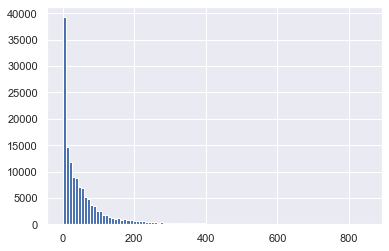

In [510]:
plt.hist(ts['West'], bins = 100);
#plt.axis([0, 400, 0, 40000]);

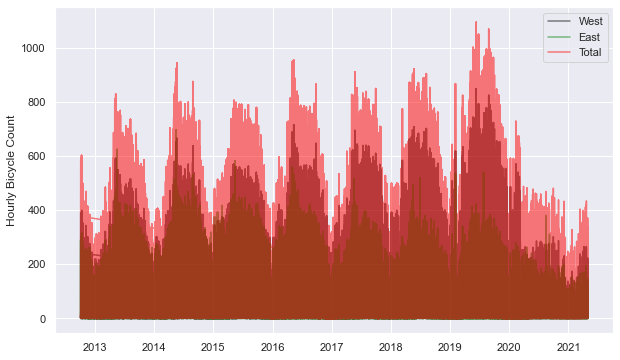

In [516]:
# Plotting the raw data
plt.figure(figsize=(10,6))
plt.plot(ts['West'], color= 'black', alpha=0.5)
plt.plot(ts['East'], color= 'green', alpha=0.5)
plt.plot(ts['Total'], color= 'red', alpha=0.5)
plt.ylabel('Hourly Bicycle Count')
plt.legend(ts.columns);

In [512]:
# Aggregating dataset by week
ts_weekly = ts.resample('W').sum()

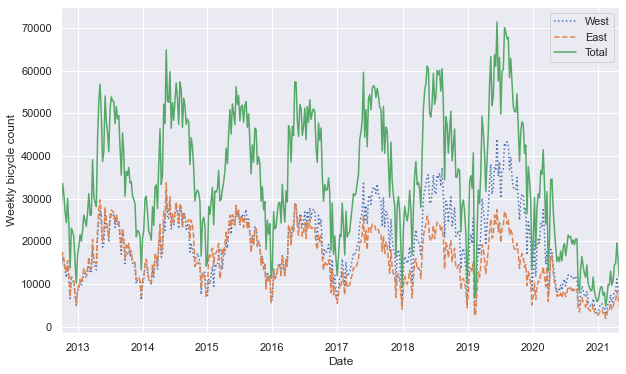

In [515]:
# Plotting new dataset that aggregated by week
ts_weekly.plot(figsize=(10,6), style=[':', '--', '-']);
plt.ylabel('Weekly bicycle count');

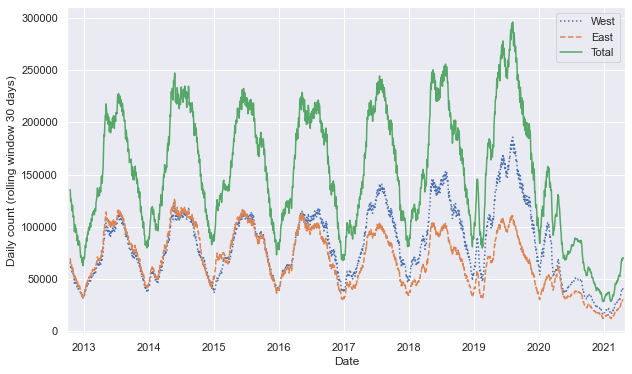

In [514]:
# Aggregating data by using a rolling Window of 30 days
ts_daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'], figsize = (10,6))
plt.ylabel('Daily count (rolling window 30 days)');

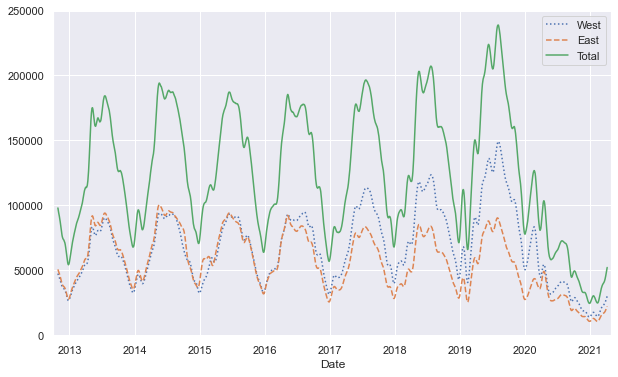

In [513]:
# Applying a gaussian rolling window type to smooth the trend
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':', '--', '-'], figsize = (10,6));

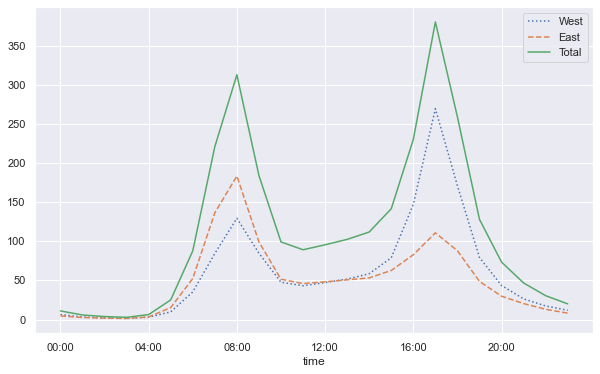

In [501]:
# Looking at the trend per hour of the day
ts_daytime = ts.groupby(ts.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
ts_daytime.plot(xticks=hourly_ticks, style=[':', '--', '-'], figsize = (10,6));

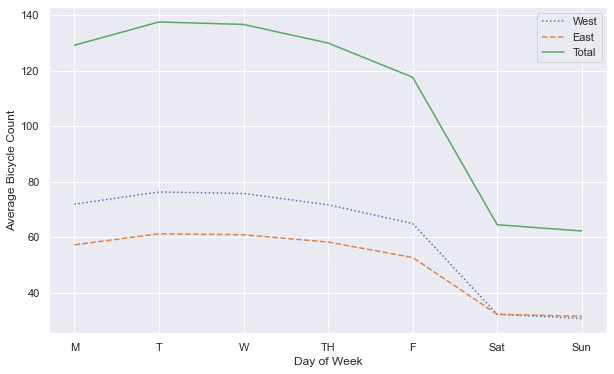

In [492]:
# Looking at the trend per day of week
by_weekday = ts.groupby(ts.index.dayofweek).mean()
by_weekday.index = ['M','T','W','TH', 'F', 'Sat', 'Sun']
by_weekday.plot(style=[':', '--', '-'], figsize = (10,6), grid=True, xlabel = 'Day of Week', ylabel = 'Average Bicycle Count');

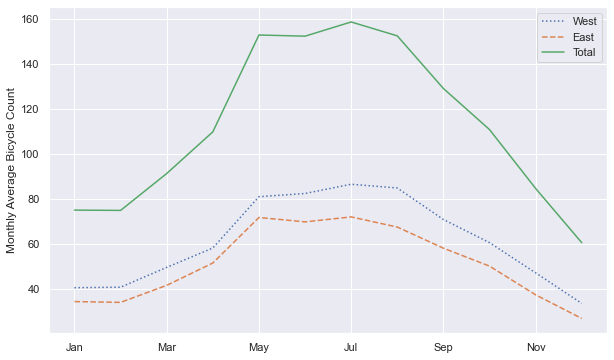

In [519]:
by_month = ts.groupby(ts.index.month).mean()
by_month.index = ['Jan','Feb','Mar','Apr', 'May', 'Jun', 'Jul','Aug','Sep','Oct','Nov','Dec']
by_month.plot(style=[':', '--', '-'], figsize = (10,6), grid=True, ylabel = 'Monthly Average Bicycle Count');

In [494]:
# Array of same length as dataset where every day from Mon to Friday is classified as 'Weekday'. Sat and Sun are classified as 'Weekend'
ts_weekend = np.where(ts.index.weekday < 5, 'Weekday', 'Weekend')
ts_by_time = ts.groupby([ts_weekend, ts.index.time]).mean()

In [495]:
ts_weekend

array(['Weekday', 'Weekday', 'Weekday', ..., 'Weekday', 'Weekday',
       'Weekday'], dtype='<U7')

In [524]:
# Grouping the bicycle data by weekday and weekend. Second level of index is datetime type.
# To access a specific row based on second level of the multiindex, the code in any of the following two cells can be used.
ts_by_time.head(3)

West      East     Total
Weekday 00:00:00  5.269770  3.947281  9.217051
        01:00:00  2.520779  2.044170  4.564949
        02:00:00  1.546189  1.495607  3.041795

In [525]:
# Option 1: Accessing the second row above
ts_by_time.loc['Weekday'].loc[time(1,0,0)]

West     2.520779
East     2.044170
Total    4.564949
Name: 01:00:00, dtype: float64

In [526]:
# Option 2: Accessing the second row above
ts_by_time.loc[('Weekday',time(1,0,0))]

West     2.520779
East     2.044170
Total    4.564949
Name: (Weekday, 01:00:00), dtype: float64

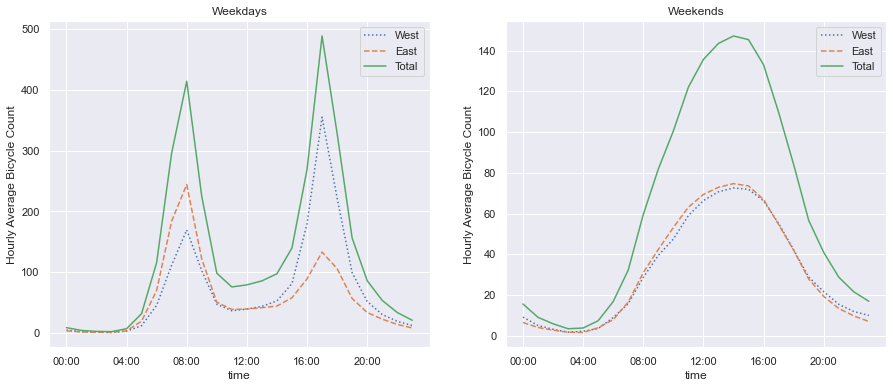

In [517]:
# Plotting hourly trend for weekdays and weekend days separately.

fig, ax = plt.subplots(1, 2, figsize=(15,6))

ts_by_time.loc['Weekday'].plot(ax=ax[0], title='Weekdays', 
                               ylabel = 'Hourly Average Bicycle Count', xticks=hourly_ticks, style=[':', '--', '-'])
ts_by_time.loc['Weekend'].plot(ax=ax[1], title='Weekends',
                               ylabel = 'Hourly Average Bicycle Count', xticks=hourly_ticks, style=[':', '--', '-']);